In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.stats import ttest_ind
from scipy.stats import levene
import statsmodels.api as sm

In [118]:
data = 'output/cleaned_data.csv'
data = pd.read_csv(data)

In [119]:
data_male = data[data['sex'] == 'Male']['chol']
data_female = data[data['sex'] == 'Female']['chol']

In [120]:
normality_male = shapiro(data_male)
normality_female = shapiro(data_female)

normality_male, normality_female

(ShapiroResult(statistic=0.9943470043175925, pvalue=0.048170943224919716),
 ShapiroResult(statistic=0.982318430862002, pvalue=0.031794606729393216))

In [ ]:
data_male_transformed, _ = boxcox(data_male+1)
data_female_transformed, _ = boxcox(data_female+1)

In [121]:
shapiro_male = shapiro(data_male_transformed)
shapiro_female = shapiro(data_female_transformed)
variance_test = levene(data_male, data_female)

shapiro_male, shapiro_female, variance_test

(ShapiroResult(statistic=0.9971058361961915, pvalue=0.4801787527387094),
 ShapiroResult(statistic=0.9864416701049873, pvalue=0.10569947218939801),
 LeveneResult(statistic=3.1906902997640096, pvalue=0.07449645288932515))

In [ ]:
t_stat, p_value = ttest_ind(data_male_transformed, data_female_transformed)
print('t-statistic=%.3f, p-value=%.3f' % (t_stat, p_value))

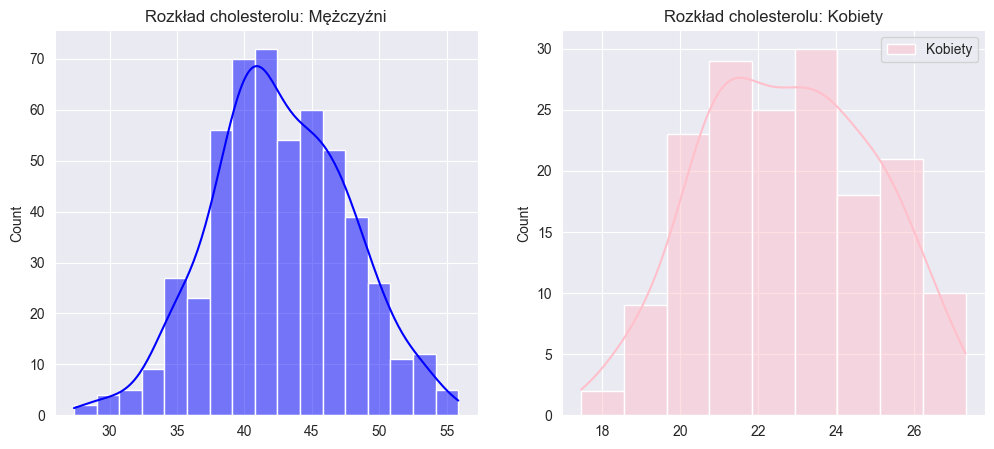

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data_male_transformed, kde=True, color="blue", ax=ax[0], label='Mężczyźni')
sns.histplot(data_female_transformed, kde=True, color="pink", ax=ax[1], label='Kobiety')
ax[0].set_title('Rozkład cholesterolu: Mężczyźni')
ax[1].set_title('Rozkład cholesterolu: Kobiety')
plt.legend()
plt.show()

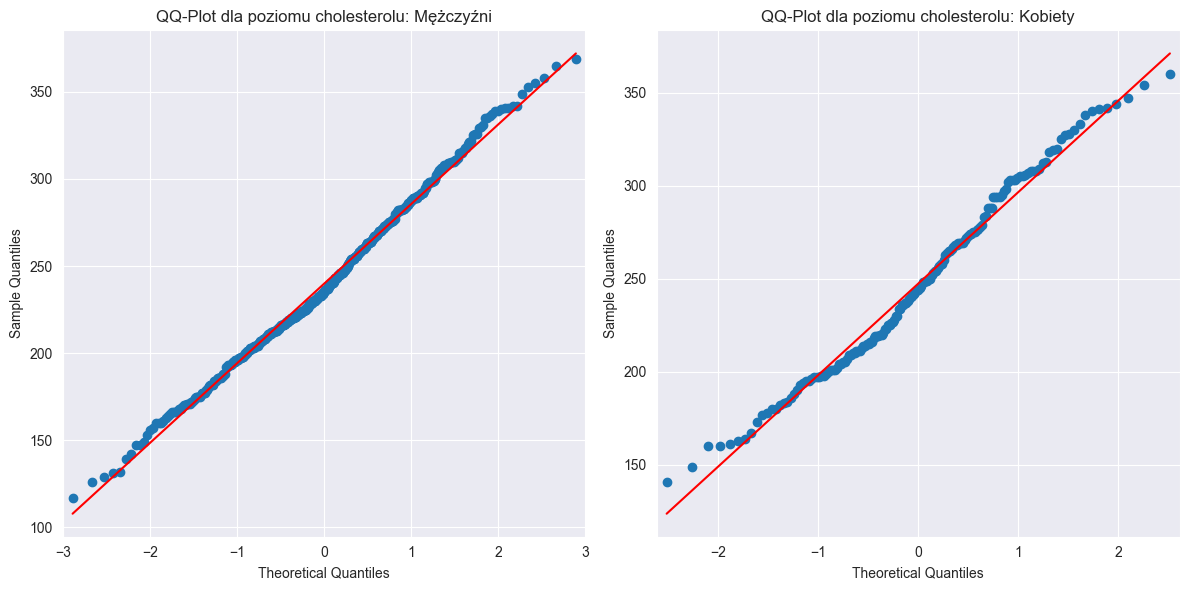

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sm.qqplot(data_male, line='s', ax=ax[0])
ax[0].set_title('QQ-Plot dla poziomu cholesterolu: Mężczyźni')

sm.qqplot(data_female, line='s', ax=ax[1])
ax[1].set_title('QQ-Plot dla poziomu cholesterolu: Kobiety')

plt.tight_layout()
plt.show()

Hipotezy
Hipoteza zerowa (H0): Nie ma różnicy w medianach poziomu cholesterolu między mężczyznami a kobietami.
Hipoteza alternatywna (H1): Istnieje różnica w medianach poziomu cholesterolu między mężczyznami a kobietami.

In [129]:
from scipy.stats import mannwhitneyu

statistic, p_value = ttest_ind(data_male_transformed, data_female_transformed)

print(f'Statystyka testu: {statistic}')
print(f'P-wartość: {p_value}')

Statystyka testu: 49.25890324174519
P-wartość: 2.043752943647703e-228
